In [1]:
!nvidia-smi

Thu Feb 20 09:29:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-h8m30zh2
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-h8m30zh2
  Resolved https://github.com/huggingface/diffusers.git to commit b2ca39c8ac160d58923c889a6ffc16a5734f7e84
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.33.0.dev0-py3-none-any.whl size=3354388 sha256=8bf6b36b8d7cc7e1a441b0d00dd02dc36135e5a04b7367b9f3d217f92222402f
  Stored in directory: /tmp/pip-ephem-wheel-cache-2zqq4166/wheels/d2/5c/5f/16639722ea17ecb73ab461b81718584bac08af2801619786b9
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.32.2
    Uninstalling diffusers-0.32.2:
      Successfully uninstalled diffusers-0.32.2


In [3]:
!pip install transformers
!pip install xformers
!pip install scipy
!pip install accelerate
!pip install gradio

Transformers===library for NLP==developed by Hugging Face

Xformers==library ==library for NLP ==text generation,text classsfication

scipy==scientific python==integration,differentiation,fourier transform

accelerate=GPU peformance-enhance

gradio==create i/p and o/p interface





In [4]:
!pip install --upgrade git+https://github.com/huggingface/diffusers.git
!pip install transformers
!pip install xformers
!pip install scipy
!pip install accelerate
!pip install gradio
# Install torch, torchvision, and torchaudio together to avoid circular import issues
!pip install torch torchvision torchaudio
from diffusers import StableDiffusionPipeline,EulerDiscreteScheduler

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-_blm5qy_
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-_blm5qy_
  Resolved https://github.com/huggingface/diffusers.git to commit b2ca39c8ac160d58923c889a6ffc16a5734f7e84
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [6]:
model_id='stabilityai/stable-diffusion-2'
scheduler=EulerDiscreteScheduler.from_pretrained(model_id,subfolder='scheduler')
pipe=StableDiffusionPipeline.from_pretrained(model_id,scheduler=scheduler)

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer%2Fspecial_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer%2Ftokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer%2Fmerges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ure_extractor%2Fpreprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

unet%2Fconfig.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

text_encoder%2Fconfig.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer%2Fvocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae%2Fconfig.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [7]:
pipe=pipe.to('cuda')

In [12]:
def txtimg(prompt):
  img=pipe(prompt,height=768,width=768).images[0]
  return img

  0%|          | 0/50 [00:00<?, ?it/s]

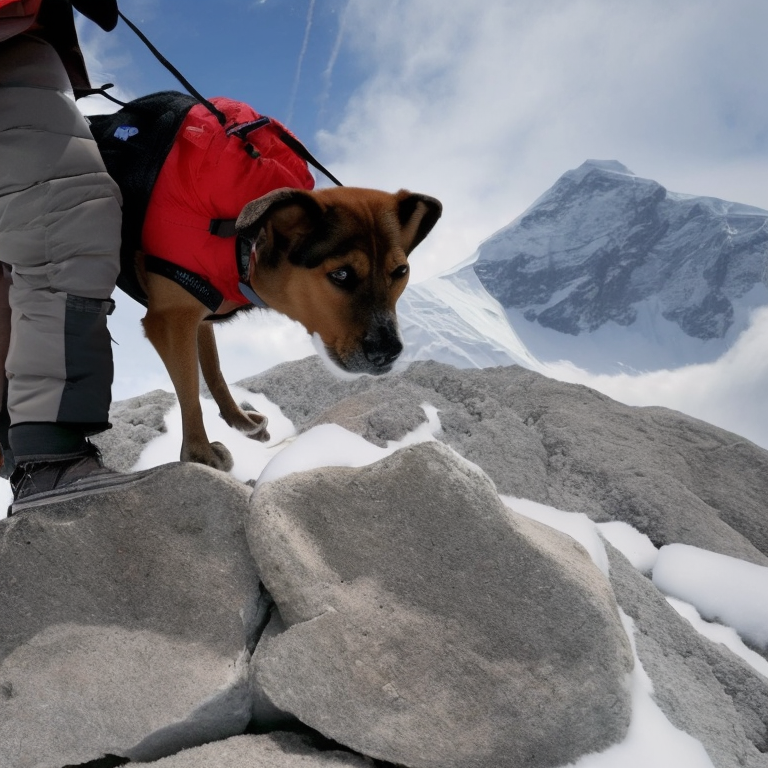

In [14]:
prompt='A dog in the summit of mt Everest'
txtimg(prompt)

In [16]:
import gradio as gr
demo=gr.Interface(fn=txtimg,inputs='text',outputs='image')
demo.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b383255597de4cec80.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
